=== DEMOGRAPHIC FEATURE SELECTION ===
Using features: ['Age', 'Education', 'Total_Dependents', 'Is_Parent']
Data shape: (2240, 4)

=== FINDING OPTIMAL CLUSTERS ===
k=2: Silhouette=0.445, Calinski-Harabasz=1551.0
k=3: Silhouette=0.358, Calinski-Harabasz=1366.7
k=4: Silhouette=0.360, Calinski-Harabasz=1269.2
k=5: Silhouette=0.362, Calinski-Harabasz=1304.5
k=6: Silhouette=0.375, Calinski-Harabasz=1274.2
k=7: Silhouette=0.381, Calinski-Harabasz=1262.7
k=8: Silhouette=0.401, Calinski-Harabasz=1302.0
k=9: Silhouette=0.413, Calinski-Harabasz=1326.3
k=10: Silhouette=0.419, Calinski-Harabasz=1346.2
k=11: Silhouette=0.425, Calinski-Harabasz=1388.6


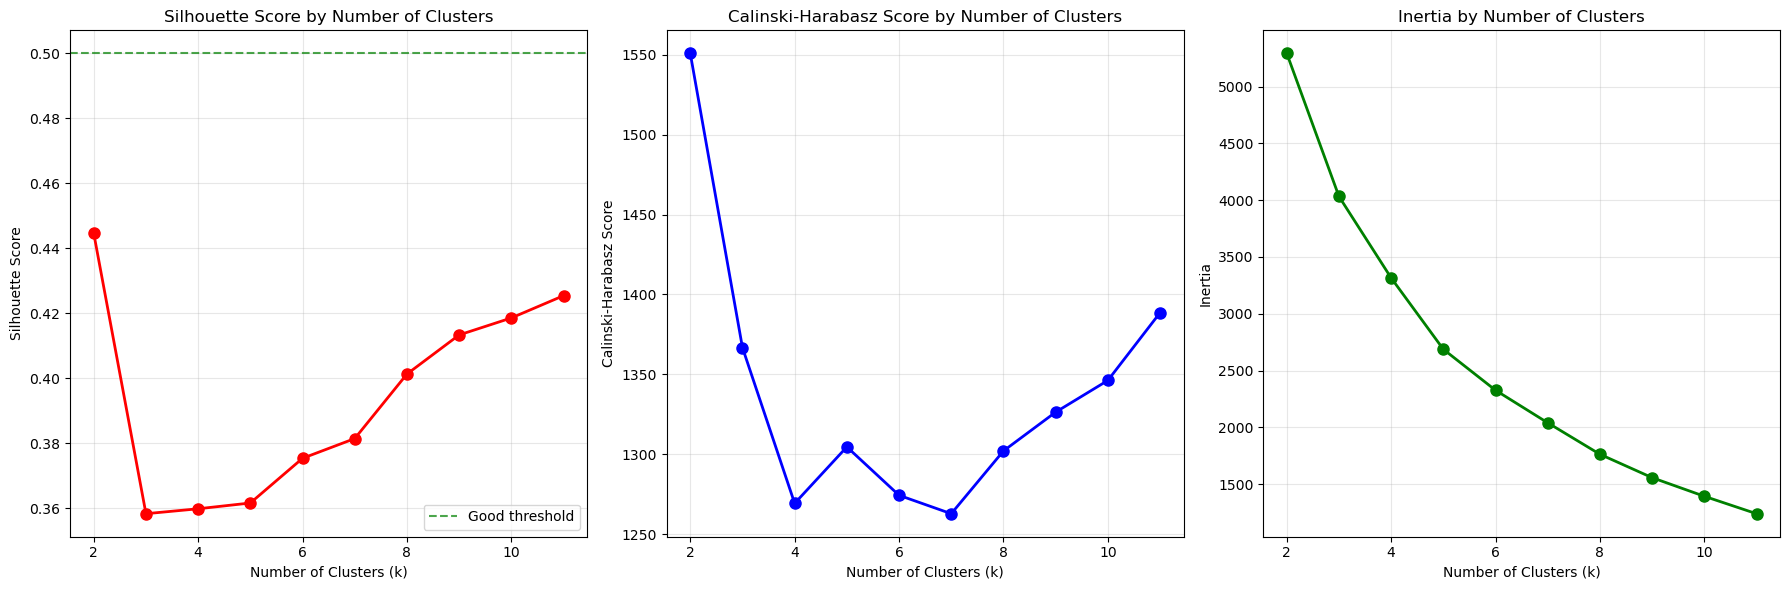


=== OPTIMAL K SELECTION ===
Best silhouette score: 0.445 at k=2
Using k=4 for better business segmentation (silhouette: 0.360)

=== FINAL CLUSTERING (k=4) ===
Final silhouette score: 0.360

=== CLUSTER ANALYSIS ===

--- CLUSTER 0 (44.9% of customers) ---
Size: 1006 customers
Age: 54.0 ± 10.6
Education: 1.81
Total Dependents: 1.3
% Parents: 100.0%
Total Spending: $375

--- CLUSTER 1 (13.8% of customers) ---
Size: 310 customers
Age: 69.2 ± 7.1
Education: 2.45
Total Dependents: 0.0
% Parents: 0.0%
Total Spending: $1004

--- CLUSTER 2 (26.6% of customers) ---
Size: 596 customers
Age: 59.5 ± 9.5
Education: 3.59
Total Dependents: 1.4
% Parents: 100.0%
Total Spending: $427

--- CLUSTER 3 (14.6% of customers) ---
Size: 328 customers
Age: 44.2 ± 7.5
Education: 2.40
Total Dependents: 0.0
% Parents: 0.0%
Total Spending: $1004


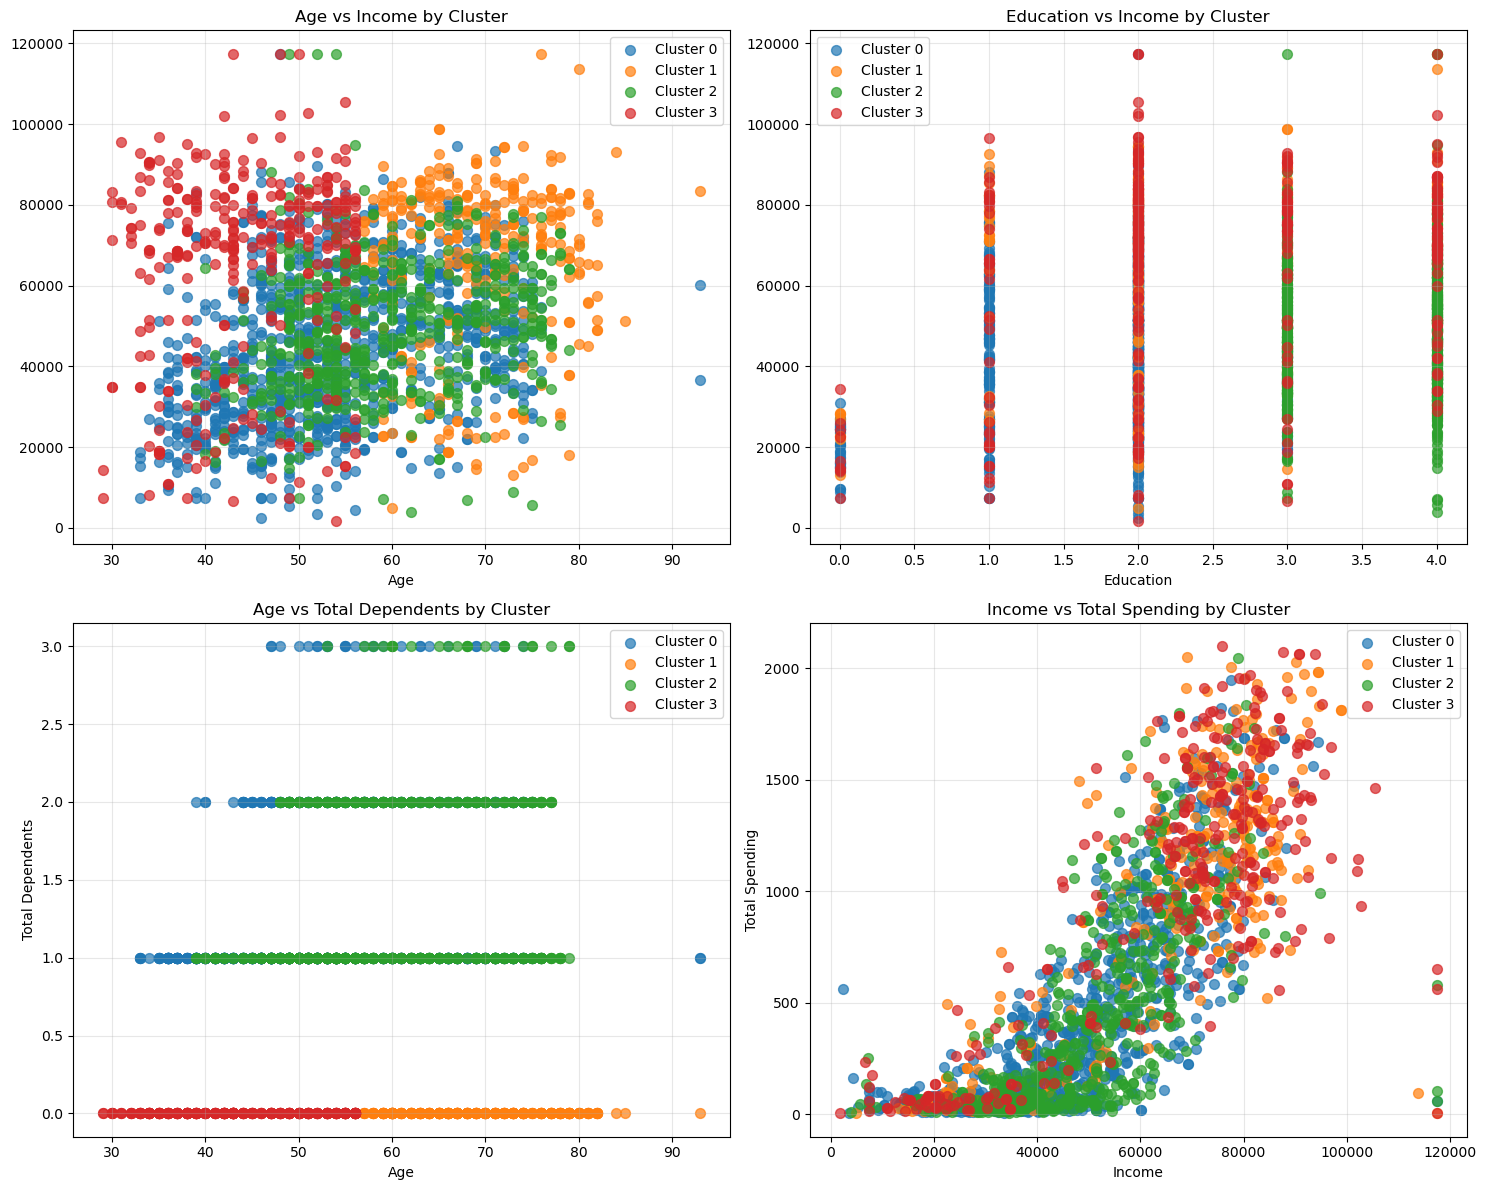


=== BUSINESS SEGMENT LABELS ===


NameError: name 'label' is not defined

In [12]:
# CLEAN DEMOGRAPHIC CLUSTERING - FIXED VERSION

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('featured_customer_segmentation.csv')

# 1. SELECT CORE DEMOGRAPHIC FEATURES
print("=== DEMOGRAPHIC FEATURE SELECTION ===")

demographic_features = [
    'Age',
    'Education', 
    
    'Total_Dependents',
    'Is_Parent'
]

print(f"Using features: {demographic_features}")

# 2. PREPARE DATA
X_demo = df[demographic_features].copy()

# Handle missing values
for col in X_demo.columns:
    if X_demo[col].isnull().sum() > 0:
        print(f"Filling {X_demo[col].isnull().sum()} missing values in {col}")
        X_demo[col] = X_demo[col].fillna(X_demo[col].median())

# Scale features
scaler = StandardScaler()
X_demo_scaled = scaler.fit_transform(X_demo)

print(f"Data shape: {X_demo_scaled.shape}")

# 3. COMPREHENSIVE CLUSTER EVALUATION
print("\n=== FINDING OPTIMAL CLUSTERS ===")

k_range = range(2, 12)  # Extended range
silhouette_scores = []
calinski_scores = []
inertias = []

for k in k_range:
    # More stable clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
    cluster_labels = kmeans.fit_predict(X_demo_scaled)
    
    sil_score = silhouette_score(X_demo_scaled, cluster_labels)
    cal_score = calinski_harabasz_score(X_demo_scaled, cluster_labels)
    inertia = kmeans.inertia_
    
    silhouette_scores.append(sil_score)
    calinski_scores.append(cal_score)
    inertias.append(inertia)
    
    print(f"k={k}: Silhouette={sil_score:.3f}, Calinski-Harabasz={cal_score:.1f}")

# 4. VISUALIZE METRICS
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Silhouette scores
axes[0].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0].set_title('Silhouette Score by Number of Clusters')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0.5, color='green', linestyle='--', alpha=0.7, label='Good threshold')
axes[0].legend()

# Calinski-Harabasz scores
axes[1].plot(k_range, calinski_scores, 'bo-', linewidth=2, markersize=8)
axes[1].set_title('Calinski-Harabasz Score by Number of Clusters')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Calinski-Harabasz Score')
axes[1].grid(True, alpha=0.3)

# Inertia (Elbow method)
axes[2].plot(k_range, inertias, 'go-', linewidth=2, markersize=8)
axes[2].set_title('Inertia by Number of Clusters')
axes[2].set_xlabel('Number of Clusters (k)')
axes[2].set_ylabel('Inertia')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. SELECT OPTIMAL K
# Consider both silhouette score and practical business sense
optimal_k_sil = k_range[np.argmax(silhouette_scores)]
best_sil_score = max(silhouette_scores)

print(f"\n=== OPTIMAL K SELECTION ===")
print(f"Best silhouette score: {best_sil_score:.3f} at k={optimal_k_sil}")

# If silhouette suggests k=2, try k=3 or k=4 for more business insight
if optimal_k_sil == 2:
    # Check if k=3 or k=4 have reasonable silhouette scores
    if len(silhouette_scores) > 2 and silhouette_scores[2] > 0.35:  # k=4
        optimal_k = 4
        print(f"Using k=4 for better business segmentation (silhouette: {silhouette_scores[2]:.3f})")
    elif len(silhouette_scores) > 1 and silhouette_scores[1] > 0.35:  # k=3
        optimal_k = 3
        print(f"Using k=3 for better business segmentation (silhouette: {silhouette_scores[1]:.3f})")
    else:
        optimal_k = optimal_k_sil
        print(f"Using k={optimal_k} based on silhouette score")
else:
    optimal_k = optimal_k_sil
    print(f"Using k={optimal_k} based on silhouette score")

# 6. APPLY FINAL CLUSTERING
print(f"\n=== FINAL CLUSTERING (k={optimal_k}) ===")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=20, max_iter=300)
df['Demographics_Cluster'] = kmeans_final.fit_predict(X_demo_scaled)

final_silhouette = silhouette_score(X_demo_scaled, df['Demographics_Cluster'])
print(f"Final silhouette score: {final_silhouette:.3f}")

# 7. ANALYZE CLUSTERS
print(f"\n=== CLUSTER ANALYSIS ===")

for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    size_pct = len(cluster_data) / len(df) * 100
    
    print(f"\n--- CLUSTER {cluster} ({size_pct:.1f}% of customers) ---")
    print(f"Size: {len(cluster_data)} customers")
    print(f"Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f}")
    print(f"Education: {cluster_data['Education'].mean():.2f}")
    
    print(f"Total Dependents: {cluster_data['Total_Dependents'].mean():.1f}")
    print(f"% Parents: {(cluster_data['Is_Parent'] == 1).mean()*100:.1f}%")
    print(f"Total Spending: ${cluster_data['Total_Spending'].mean():.0f}")

# 8. VISUALIZE CLUSTERS
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age vs Income
for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    axes[0,0].scatter(cluster_data['Age'], cluster_data['Income'], 
                     label=f'Cluster {cluster}', alpha=0.7, s=50)
axes[0,0].set_xlabel('Age')

axes[0,0].set_title('Age vs Income by Cluster')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Education vs Income
for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    axes[0,1].scatter(cluster_data['Education'], cluster_data['Income'], 
                     label=f'Cluster {cluster}', alpha=0.7, s=50)
axes[0,1].set_xlabel('Education')

axes[0,1].set_title('Education vs Income by Cluster')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Age vs Total Dependents
for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    axes[1,0].scatter(cluster_data['Age'], cluster_data['Total_Dependents'], 
                     label=f'Cluster {cluster}', alpha=0.7, s=50)
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Total Dependents')
axes[1,0].set_title('Age vs Total Dependents by Cluster')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Income vs Total Spending
for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    axes[1,1].scatter(cluster_data['Income'], cluster_data['Total_Spending'], 
                     label=f'Cluster {cluster}', alpha=0.7, s=50)
axes[1,1].set_xlabel('Income')
axes[1,1].set_ylabel('Total Spending')
axes[1,1].set_title('Income vs Total Spending by Cluster')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. BUSINESS SEGMENT LABELS
print(f"\n=== BUSINESS SEGMENT LABELS ===")

for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    
    avg_age = cluster_data['Age'].mean()
   
    avg_dependents = cluster_data['Total_Dependents'].mean()
    avg_spending = cluster_data['Total_Spending'].mean()
    
    # Create labels
    if avg_age < 35:
        age_label = "Young"
    elif avg_age < 55:
        age_label = "Middle-aged"
    else:
        age_label = "Senior"
    
   
  
    
    if avg_dependents < 0.5:
        family_label = "Singles"
    else:
        family_label = "Families"
    
   
    
    print(f"Cluster {cluster}: {label} ({size} customers)")
    print(f"  → Average spending: ${avg_spending:.0f}")

# 10. SUMMARY
print(f"\n=== SUMMARY ===")
print(f"Number of clusters: {optimal_k}")
print(f"Silhouette score: {final_silhouette:.3f}")
print(f"Features used: {demographic_features}")

summary = df.groupby('Demographics_Cluster')[demographic_features + ['Total_Spending']].mean().round(2)
print("\nCluster Summary:")
print(summary)

=== DEMOGRAPHIC CLUSTER SUMMARY ===
                        Age  Education    Income  Total_Dependents  Is_Parent
Demographics_Cluster                                                         
0                     54.03       1.81  44720.78              1.30        1.0
1                     69.20       2.45  66221.39              0.00        0.0
2                     59.48       3.59  49498.42              1.39        1.0
3                     44.23       2.40  64514.53              0.00        0.0


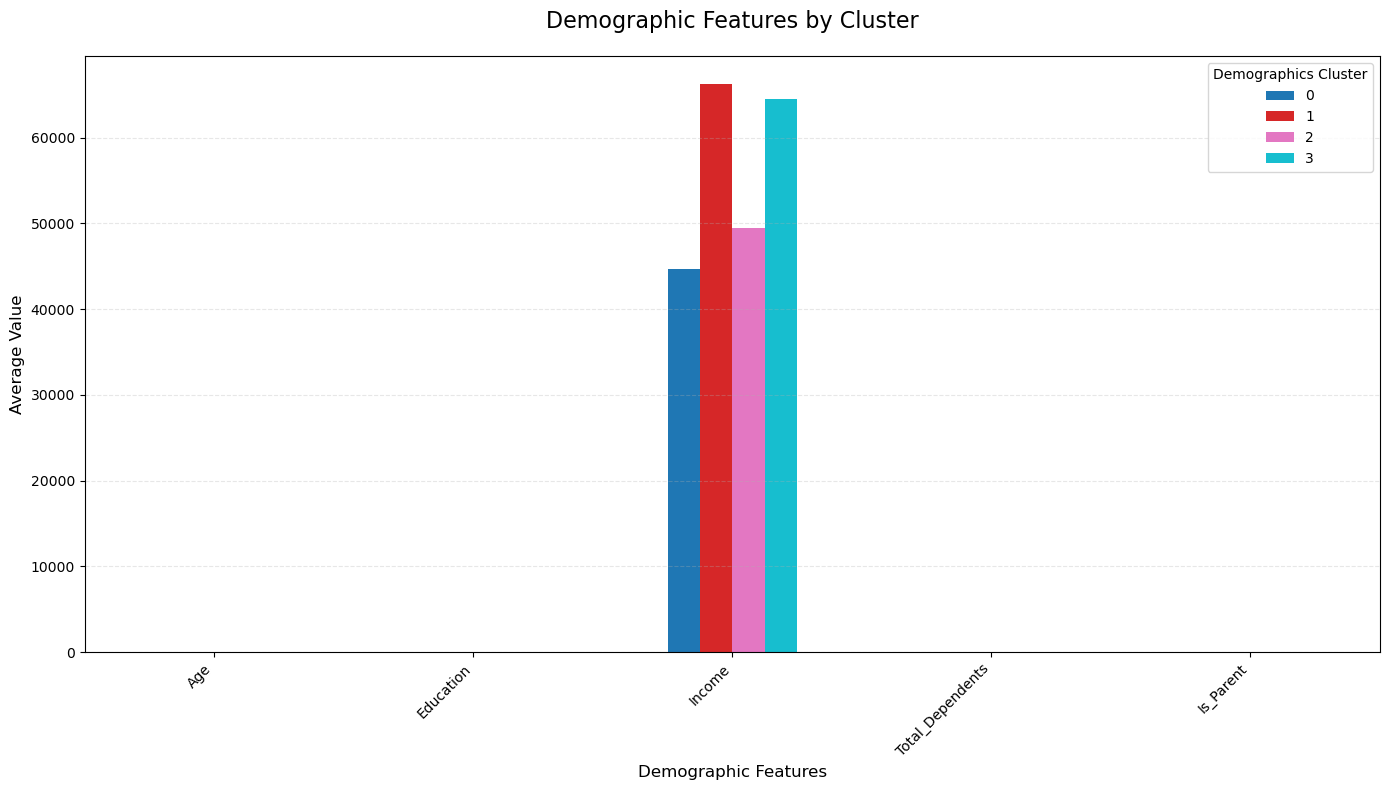

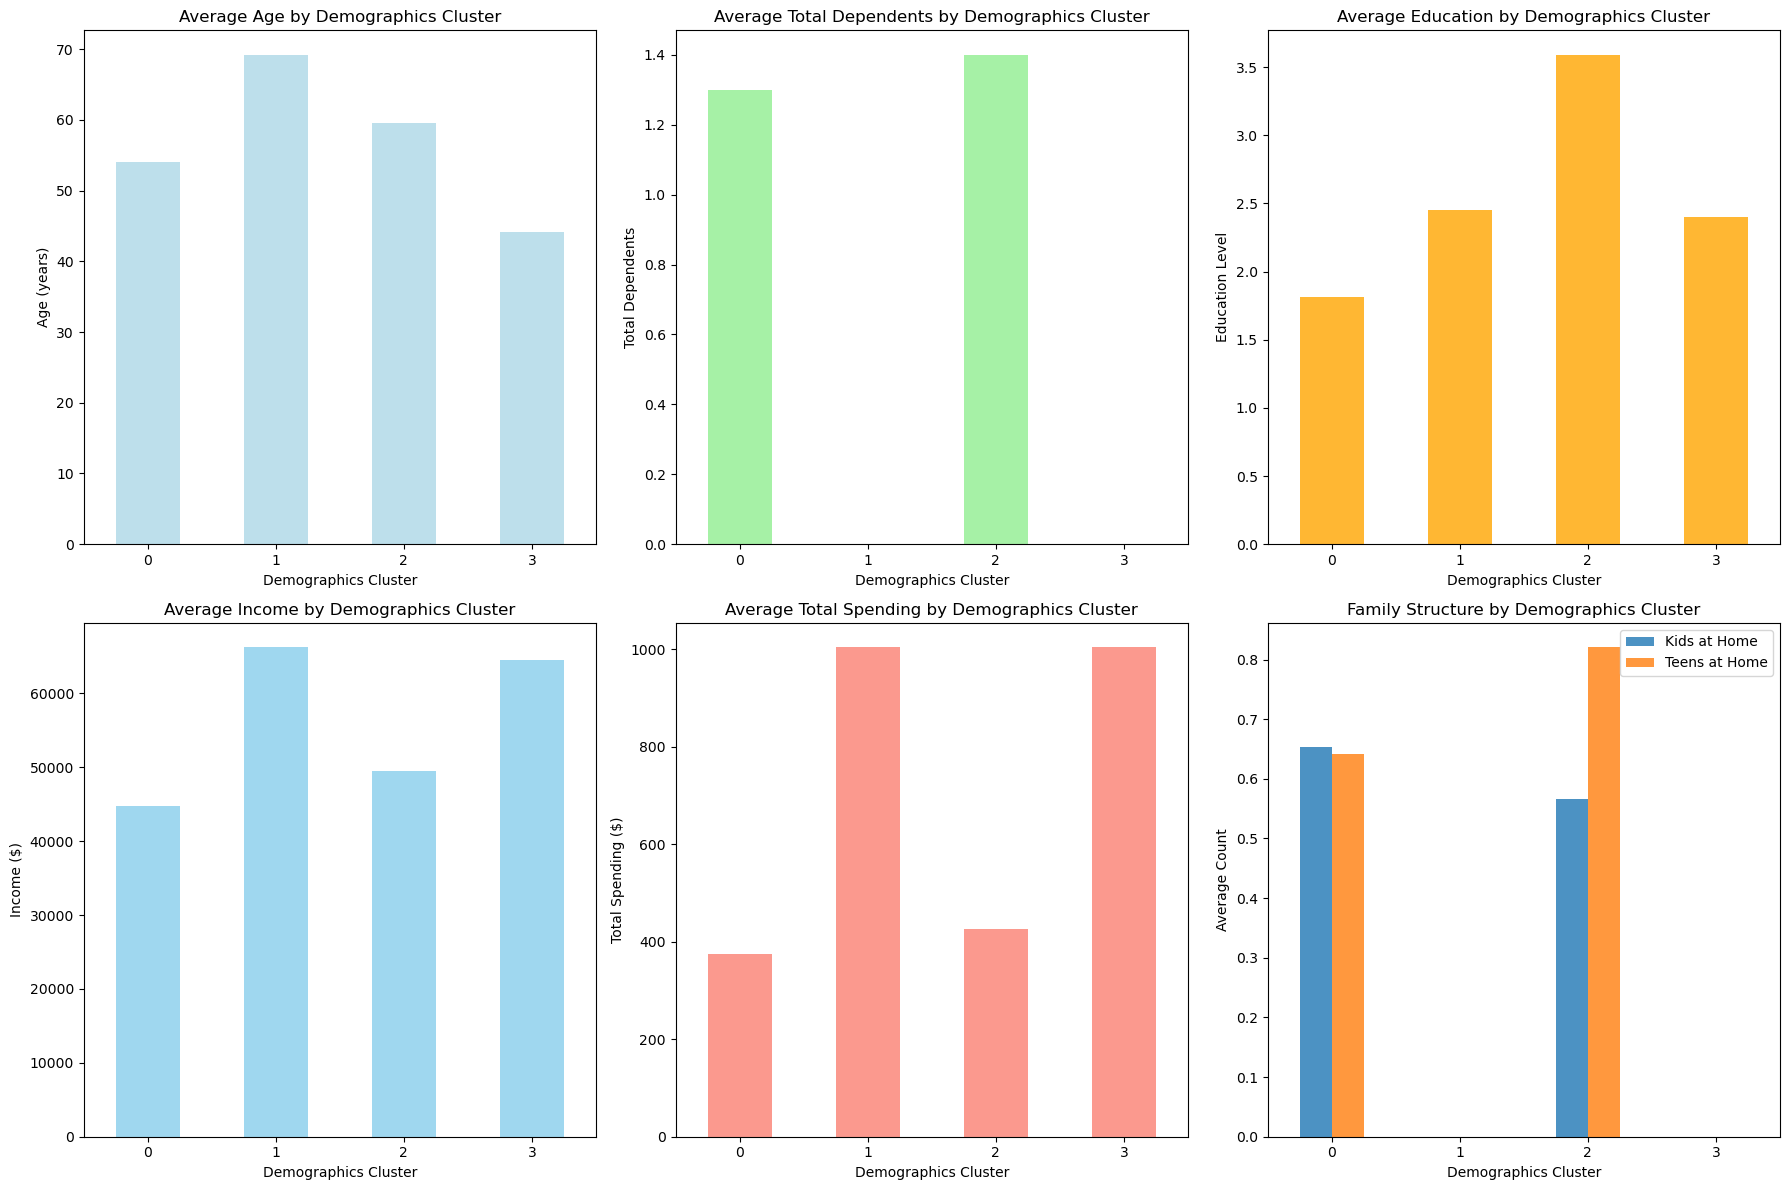


=== ENHANCED DEMOGRAPHICS CLUSTER CHARACTERISTICS ===

=== CLUSTER 0: Middle-aged Small Families ===
Size: 1006 customers (44.9%)
Age: 54.0 ± 10.6 years
Education Level: 1.81
Kids at Home: 0.7
Teens at Home: 0.6
Average Income: $44721
Average Total Spending: $375
--------------------------------------------------

=== CLUSTER 1: Senior Singles/Couples ===
Size: 310 customers (13.8%)
Age: 69.2 ± 7.1 years
Education Level: 2.45
Kids at Home: 0.0
Teens at Home: 0.0
Average Income: $66221
Average Total Spending: $1004
--------------------------------------------------

=== CLUSTER 2: Middle-aged Small Families ===
Size: 596 customers (26.6%)
Age: 59.5 ± 9.5 years
Education Level: 3.59
Kids at Home: 0.6
Teens at Home: 0.8
Average Income: $49498
Average Total Spending: $427
--------------------------------------------------

=== CLUSTER 3: Middle-aged Singles/Couples ===
Size: 328 customers (14.6%)
Age: 44.2 ± 7.5 years
Education Level: 2.40
Kids at Home: 0.0
Teens at Home: 0.0
Average Inco

In [ ]:
# =============================================================================
# DEMOGRAPHIC CLUSTER ANALYSIS (Using clusters from elbow method)
# =============================================================================

# Remove redundant clustering - we already have optimal clusters from previous step
# The Demographics_Cluster column is already created in the elbow method section

# Define comprehensive demographic analysis features
demographic_analysis_features = [
    'Age', 'Education','Income',
    'Total_Dependents',
    'Is_Parent'
] 

# Filter features that exist in the dataset
available_demo_features = [f for f in demographic_analysis_features if f in df.columns]

# Calculate cluster summary
cluster_summary = df.groupby('Demographics_Cluster')[available_demo_features].mean().round(2)
print("=== DEMOGRAPHIC CLUSTER SUMMARY ===")
print(cluster_summary)

# Plot demographic features by cluster
fig, ax = plt.subplots(figsize=(14, 8))
cluster_summary.T.plot(kind='bar', ax=ax, colormap='tab10')
plt.title('Demographic Features by Cluster', fontsize=16, pad=20)
plt.ylabel('Average Value', fontsize=12)
plt.xlabel('Demographic Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Demographics Cluster', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Create enhanced visualization for key demographic insights
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot Age by Demographics Cluster
df.groupby('Demographics_Cluster')['Age'].mean().round(1).plot(
    kind='bar', ax=axes[0,0], color='lightblue', alpha=0.8
)
axes[0,0].set_title('Average Age by Demographics Cluster', fontsize=12)
axes[0,0].set_xlabel('Demographics Cluster')
axes[0,0].set_ylabel('Age (years)')
axes[0,0].tick_params(rotation=0)

# Plot Total Dependents by Demographics Cluster
df.groupby('Demographics_Cluster')['Total_Dependents'].mean().round(1).plot(
    kind='bar', ax=axes[0,1], color='lightgreen', alpha=0.8
)
axes[0,1].set_title('Average Total Dependents by Demographics Cluster', fontsize=12)
axes[0,1].set_xlabel('Demographics Cluster')
axes[0,1].set_ylabel('Total Dependents')
axes[0,1].tick_params(rotation=0)

# Plot Education by Demographics Cluster
df.groupby('Demographics_Cluster')['Education'].mean().round(2).plot(
    kind='bar', ax=axes[0,2], color='orange', alpha=0.8
)
axes[0,2].set_title('Average Education by Demographics Cluster', fontsize=12)
axes[0,2].set_xlabel('Demographics Cluster')
axes[0,2].set_ylabel('Education Level')
axes[0,2].tick_params(rotation=0)

# Plot Income by Demographics Cluster (outcome variable)
df.groupby('Demographics_Cluster')['Income'].mean().round(0).plot(
    kind='bar', ax=axes[1,0], color='skyblue', alpha=0.8
)
axes[1,0].set_title('Average Income by Demographics Cluster', fontsize=12)
axes[1,0].set_xlabel('Demographics Cluster')
axes[1,0].set_ylabel('Income ($)')
axes[1,0].tick_params(rotation=0)

# Plot Total Spending by Demographics Cluster (outcome variable)
df.groupby('Demographics_Cluster')['Total_Spending'].mean().round(0).plot(
    kind='bar', ax=axes[1,1], color='salmon', alpha=0.8
)
axes[1,1].set_title('Average Total Spending by Demographics Cluster', fontsize=12)
axes[1,1].set_xlabel('Demographics Cluster')
axes[1,1].set_ylabel('Total Spending ($)')
axes[1,1].tick_params(rotation=0)

# Plot Family Structure (Kids + Teens)
family_structure = df.groupby('Demographics_Cluster')[['Kidhome', 'Teenhome']].mean()
family_structure.plot(kind='bar', ax=axes[1,2], alpha=0.8)
axes[1,2].set_title('Family Structure by Demographics Cluster', fontsize=12)
axes[1,2].set_xlabel('Demographics Cluster')
axes[1,2].set_ylabel('Average Count')
axes[1,2].tick_params(rotation=0)
axes[1,2].legend(['Kids at Home', 'Teens at Home'])

plt.tight_layout()
plt.show()

# Enhanced cluster characteristics with meaningful labels
print("\n=== ENHANCED DEMOGRAPHICS CLUSTER CHARACTERISTICS ===")

# Create cluster labels based on characteristics
cluster_labels = {}
for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    
    # Determine cluster characteristics
    avg_age = cluster_data['Age'].mean()
    avg_dependents = cluster_data['Total_Dependents'].mean()
    avg_education = cluster_data['Education'].mean()
    
    # Create meaningful label
    if avg_age < 40:
        age_label = "Young"
    elif avg_age < 60:
        age_label = "Middle-aged"
    else:
        age_label = "Senior"
    
    if avg_dependents < 0.5:
        family_label = "Singles/Couples"
    elif avg_dependents < 1.5:
        family_label = "Small Families"
    else:
        family_label = "Large Families"
    
    cluster_labels[cluster] = f"{age_label} {family_label}"

# Print detailed analysis with labels
for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    print(f"\n=== CLUSTER {cluster}: {cluster_labels[cluster]} ===")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    
    # Core demographics
    print(f"Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f} years")
    print(f"Education Level: {cluster_data['Education'].mean():.2f}")

    print(f"Kids at Home: {cluster_data['Kidhome'].mean():.1f}")
    print(f"Teens at Home: {cluster_data['Teenhome'].mean():.1f}")
    
    # Financial outcomes (not clustering variables)
    print(f"Average Income: ${cluster_data['Income'].mean():.0f}")
    print(f"Average Total Spending: ${cluster_data['Total_Spending'].mean():.0f}")
    
   
    
    print("-" * 50)

# Create a summary table of cluster characteristics
print("\n=== CLUSTER SUMMARY TABLE ===")
summary_data = []
for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    summary_data.append({
        'Cluster': cluster,
        'Label': cluster_labels[cluster],
        'Size': len(cluster_data),
        'Size%': f"{len(cluster_data)/len(df)*100:.1f}%",
        'Avg_Age': f"{cluster_data['Age'].mean():.1f}",

        'Avg_Education': f"{cluster_data['Education'].mean():.2f}",
        'Avg_Income': f"${cluster_data['Income'].mean():.0f}",
        'Avg_Spending': f"${cluster_data['Total_Spending'].mean():.0f}"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


DEMOGRAPHICS MEANS BY DEMOGRAPHICS CLUSTER:
                        Age  Education  Total_Dependents  Teenhome  Kidhome
Demographics_Cluster                                                       
0                     54.03       1.81              1.30      0.64     0.65
1                     69.20       2.45              0.00      0.00     0.00
2                     59.48       3.59              1.39      0.82     0.57
3                     44.23       2.40              0.00      0.00     0.00


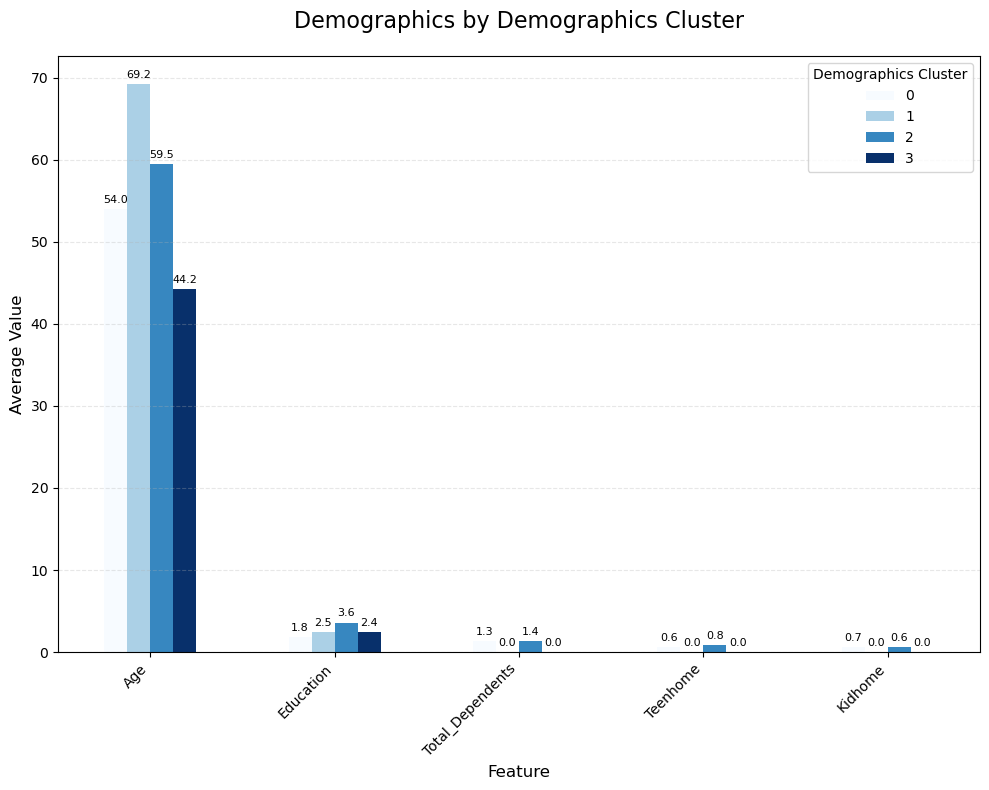


EXPENSES MEANS BY DEMOGRAPHICS CLUSTER:
                      MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Demographics_Cluster                                                          
0                       196.57      16.69            85.94            23.26   
1                       485.49      39.60           318.19            64.52   
2                       286.16       9.94            78.96            14.04   
3                       481.52      41.36           322.56            61.50   

                      MntSweetProducts  MntGoldProds  
Demographics_Cluster                                  
0                                17.07         35.85  
1                                39.52         56.48  
2                                 9.81         28.15  
3                                42.28         55.20  


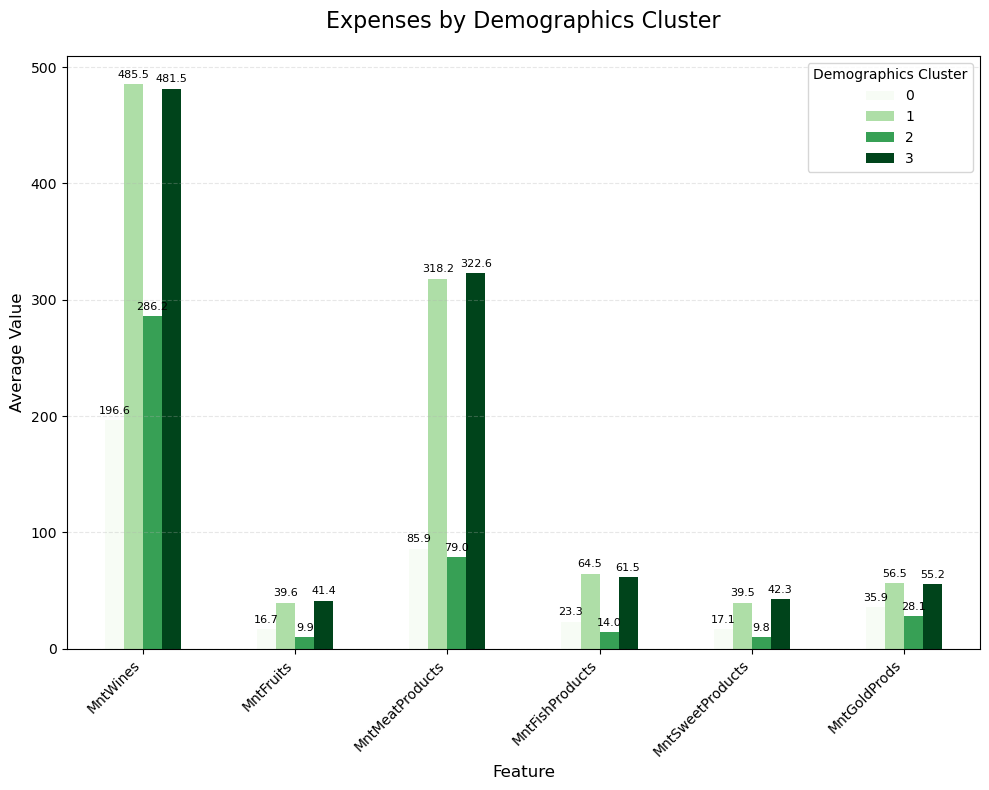


PURCHASE CHANNELS MEANS BY DEMOGRAPHICS CLUSTER:
                      NumWebPurchases  NumStorePurchases  NumCatalogPurchases  \
Demographics_Cluster                                                            
0                                3.81               5.04                 1.71   
1                                4.52               7.21                 4.86   
2                                4.15               5.48                 1.97   
3                                4.23               7.31                 4.51   

                      NumDealsPurchases  NumWebVisitsMonth  
Demographics_Cluster                                        
0                                  2.62               6.09  
1                                  1.10               3.38  
2                                  2.72               5.95  
3                                  1.09               3.51  


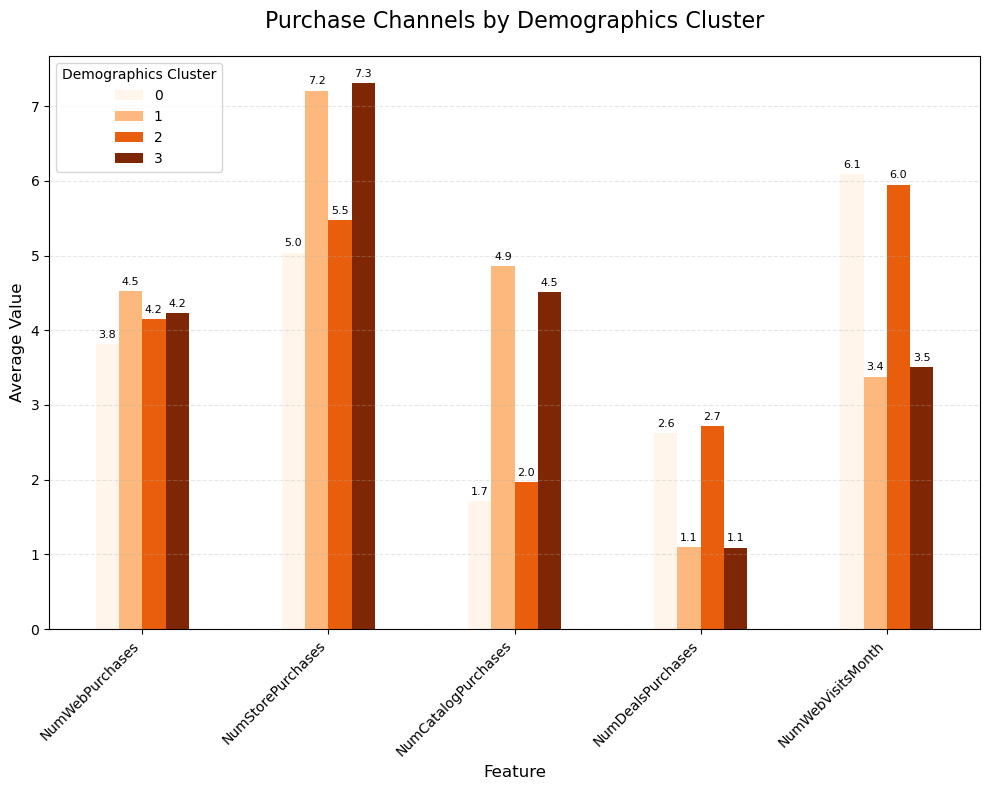


CASH MEANS BY DEMOGRAPHICS CLUSTER:
                      Total_Spending    Income
Demographics_Cluster                          
0                             375.38  44720.78
1                            1003.80  66221.39
2                             427.06  49498.42
3                            1004.41  64514.53


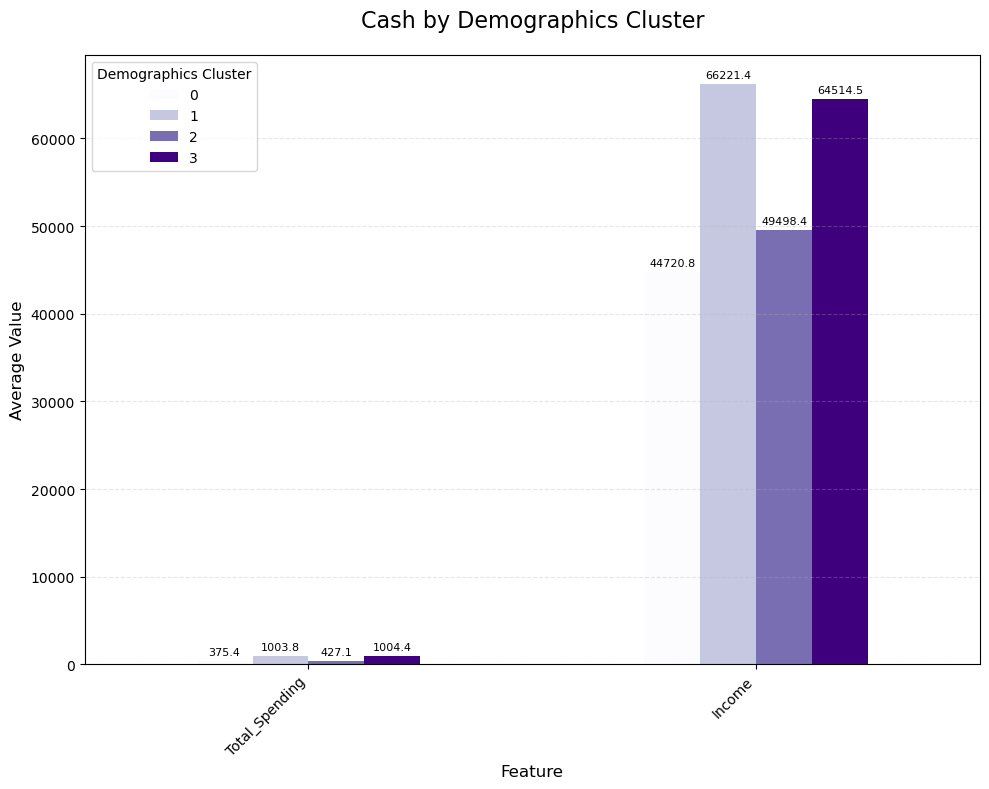


CHANNEL RATIOS MEANS BY DEMOGRAPHICS CLUSTER:
                      Web_Ratio  Store_Ratio  Catalog_Ratio  Deals_Ratio
Demographics_Cluster                                                    
0                          0.35         0.53           0.12         0.30
1                          0.28         0.45           0.27         0.09
2                          0.35         0.51           0.13          inf
3                          0.27         0.48           0.25          inf


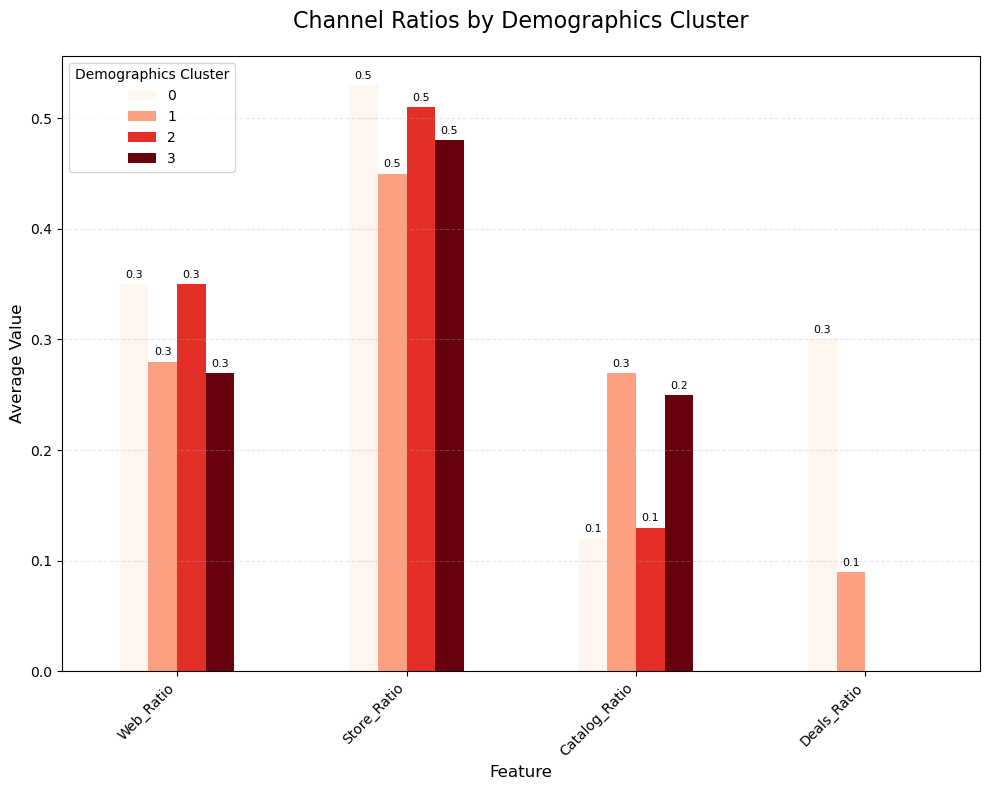


EXPENSE RATIOS MEANS BY DEMOGRAPHICS CLUSTER:
                      Wine_Ratio  Fruit_Ratio  Meat_Ratio  Fish_Ratio  \
Demographics_Cluster                                                    
0                           0.42         0.06        0.24        0.08   
1                           0.43         0.05        0.30        0.08   
2                           0.61         0.02        0.21        0.03   
3                           0.41         0.05        0.31        0.08   

                      Sweet_Ratio  Gold_Ratio  
Demographics_Cluster                           
0                            0.06        0.15  
1                            0.06        0.08  
2                            0.02        0.10  
3                            0.06        0.09  


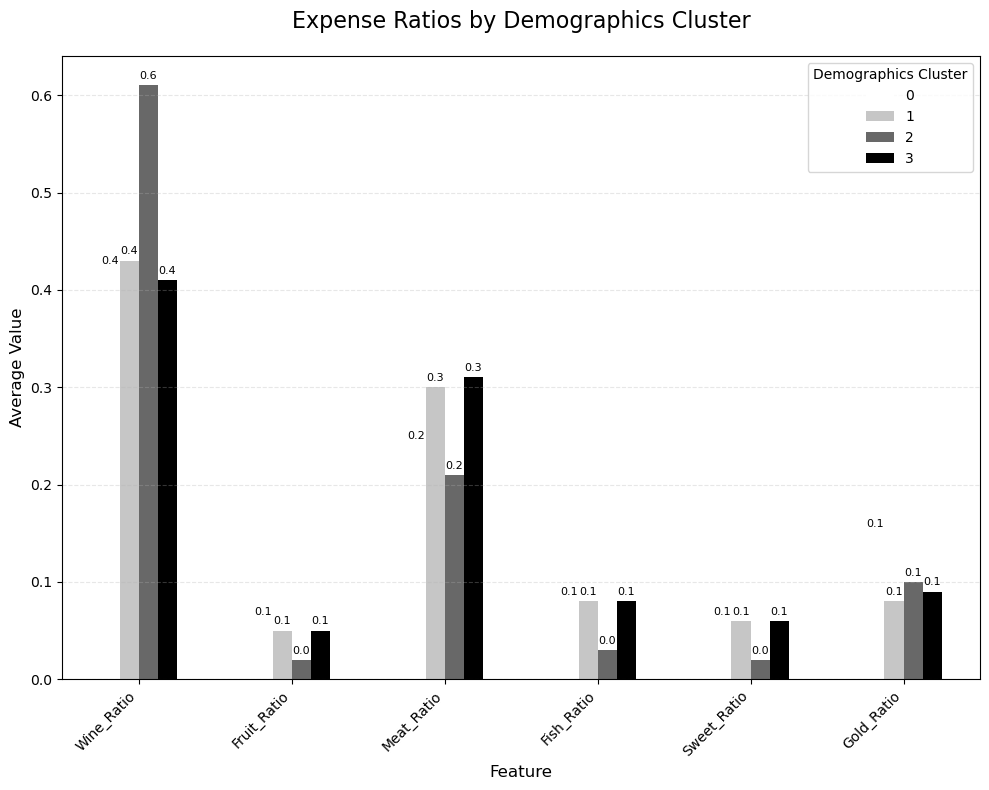


=== DEMOGRAPHICS CLUSTER BEHAVIOR ANALYSIS ===

--- Demographics Cluster 0 Profile ---
Size: 1006 customers (44.9%)
Age: 54.0 ± 10.6
Total Dependents: 1.3
Education Level: 1.81
Income: $44721
Total Spending: $375

--- Demographics Cluster 1 Profile ---
Size: 310 customers (13.8%)
Age: 69.2 ± 7.1
Total Dependents: 0.0
Education Level: 2.45
Income: $66221
Total Spending: $1004

--- Demographics Cluster 2 Profile ---
Size: 596 customers (26.6%)
Age: 59.5 ± 9.5
Total Dependents: 1.4
Education Level: 3.59
Income: $49498
Total Spending: $427

--- Demographics Cluster 3 Profile ---
Size: 328 customers (14.6%)
Age: 44.2 ± 7.5
Total Dependents: 0.0
Education Level: 2.40
Income: $64515
Total Spending: $1004


In [ ]:
# Organize features by category for Demographics-based Analysis
feature_categories = {
    'Demographics': ['Age', 'Education', 'Total_Dependents',
                    'Teenhome', 'Kidhome'],
    'Expenses': ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    'Purchase Channels': ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases',
                         'NumDealsPurchases','NumWebVisitsMonth'],
    'Cash': ['Total_Spending','Income'],
    'Channel Ratios': ['Web_Ratio', 'Store_Ratio', 'Catalog_Ratio', 'Deals_Ratio'],
    'Expense Ratios': ['Wine_Ratio', 'Fruit_Ratio', 'Meat_Ratio',
                         'Fish_Ratio', 'Sweet_Ratio', 'Gold_Ratio']
}

# Color palettes for each category
color_palettes = {
    'Cash': 'Purples',
    'Demographics': 'Blues',
    'Purchase Channels': 'Oranges',
    'Channel Ratios': 'Reds',
    'Expenses': 'Greens',
    'Expense Ratios': 'Greys'
}

# Plot each category by Demographics Cluster
for category_name, features in feature_categories.items():
    # Filter features that exist in the dataset
    available_features = [f for f in features if f in df.columns]
    
    if not available_features:
        print(f"No features available for {category_name}")
        continue
        
    # Calculate means by Demographics cluster
    cluster_means = df.groupby('Demographics_Cluster')[available_features].mean().round(2)
    print(f"\n{category_name.upper()} MEANS BY DEMOGRAPHICS CLUSTER:")
    print(cluster_means)

    # Create figure with appropriate size based on feature count
    fig_width = min(14, max(10, len(available_features)))
    fig, ax = plt.subplots(figsize=(fig_width, 8))

    # Plot the transposed data for better visualization
    cluster_means.T.plot(kind='bar', ax=ax, colormap=color_palettes[category_name])

    # Add styling
    plt.title(f'{category_name} by Demographics Cluster', fontsize=16, pad=20)
    plt.ylabel('Average Value', fontsize=12)
    plt.xlabel('Feature', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Demographics Cluster', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', padding=3, fontsize=8)

    plt.tight_layout()
    plt.show()

# Additional Demographics-specific analysis
print("\n=== DEMOGRAPHICS CLUSTER BEHAVIOR ANALYSIS ===")




for cluster in sorted(df['Demographics_Cluster'].unique()):
    cluster_data = df[df['Demographics_Cluster'] == cluster]
    print(f"\n--- Demographics Cluster {cluster} Profile ---")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    
    # Core demographics
    print(f"Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f}")
    print(f"Total Dependents: {cluster_data['Total_Dependents'].mean():.1f}")
    print(f"Education Level: {cluster_data['Education'].mean():.2f}")
    
    # Financial profile
    print(f"Income: ${cluster_data['Income'].mean():.0f}")
    print(f"Total Spending: ${cluster_data['Total_Spending'].mean():.0f}")
    
   

In [19]:
# DEMOGRAPHIC CLUSTER PREDICTION MODEL FOR NEW CUSTOMERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load the dataset with existing clusters
df = pd.read_csv('featured_customer_segmentation.csv')

# Verify we have Demographics_Cluster
if 'Demographics_Cluster' not in df.columns:
    print("Error: Run demographic clustering first!") 
    df['Demographics_Cluster'] = kmeans_final.fit_predict(X_demo_scaled)
    
print("=== DEMOGRAPHIC CLUSTER PREDICTION MODEL ===")
print(f"Total customers: {len(df)}")
print(f"Cluster distribution:\n{df['Demographics_Cluster'].value_counts().sort_index()}")

# Replace this section in Cell 4 of your notebook:

# 1. FEATURE SELECTION FOR PREDICTION MODEL
print("\n=== FEATURE SELECTION FOR NEW CUSTOMER PREDICTION ===")

# Features that would be available for NEW customers (matching Flask app)
prediction_features = [
    # Core demographics (available at signup)
    'Age', 
    'Education', 
    'Income',
    'Total_Dependents', 
    'Is_Parent',
    'Kidhome', 
    'Teenhome',
    
    # Marital status (if available) - these should be in your dataset
    'Marital_Divorced', 
    'Marital_Married', 
    'Marital_Single',
    'Marital_Together', 
    'Marital_Widow'
]

# Filter features that exist in the dataset
available_features = [f for f in prediction_features if f in df.columns]
print(f"Available features for new customer prediction: {len(available_features)}")
print(f"Features: {available_features}")

# If marital status columns don't exist, create them from Marital_Status
if 'Marital_Status' in df.columns and 'Marital_Single' not in df.columns:
    print("Creating marital status dummy variables...")
    marital_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital')
    df = pd.concat([df, marital_dummies], axis=1)
    
    # Update available features
    available_features = [f for f in prediction_features if f in df.columns]
    print(f"Updated features after creating dummies: {len(available_features)}")
    print(f"Features: {available_features}")

Error: Run demographic clustering first!
=== DEMOGRAPHIC CLUSTER PREDICTION MODEL ===
Total customers: 2240
Cluster distribution:
Demographics_Cluster
0    1006
1     310
2     596
3     328
Name: count, dtype: int64

=== FEATURE SELECTION FOR NEW CUSTOMER PREDICTION ===
Available features for new customer prediction: 12
Features: ['Age', 'Education', 'Income', 'Total_Dependents', 'Is_Parent', 'Kidhome', 'Teenhome', 'Marital_Divorced', 'Marital_Married', 'Marital_Single', 'Marital_Together', 'Marital_Widow']
